# STATS 507 Final Project Code

Name: Yanran Chen

Email: yanranc@umich.edu

# Part I: Initial Dataset Overview


This section loads the raw used car dataset, examines its basic structure, and inspects the initial formats of key fields such as price, mileage, and engine to prepare for data cleaning and feature engineering.


## 1.1: Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Matplotlib for data visualization

# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)   # Show all columns when printing DataFrames
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')  # Format floating numbers to 2 decimals

## 1.2: Load Dataset

In [20]:
file_path = "used_cars.csv"
df = pd.read_csv(file_path)

# Preview the first few rows of the dataset
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## 1.3: Basic Dataset Overview

In [21]:
# Print the shape of the dataset
print("Shape (rows, columns):", df.shape)

# Display column names, data types, and non-null counts
print("\nColumn info:")
print(df.info())

# Show the number of missing values for each column
print("\nNumber of missing values per column:")
print(df.isna().sum())

# Basic statistics for numeric-like columns
print("\nBasic description for numeric-like columns:")
print(df[['model_year']].describe())

# Show the number of unique values for selected categorical columns
print("\nUnique values count for some important categorical columns:")
for col in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']:
    print(f"{col}: {df[col].nunique()} unique values")

Shape (rows, columns): (4009, 12)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None

Number of missing values per column:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
i

## 1.4: Inspect Raw Formats of Price, Mileage, and Engine Columns

In [22]:
# Display the first few raw values in the 'price' column
print("Sample price values:")
print(df['price'].head(10))

# Display the first few raw values in the 'milage' column
print("\nSample milage values:")
print(df['milage'].head(10))

# Display the first few raw values in the 'engine' column
print("\nSample engine values:")
print(df['engine'].head(10))

Sample price values:
0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
5    $14,798
6    $31,000
7     $7,300
8    $41,927
9    $69,950
Name: price, dtype: object

Sample milage values:
0     51,000 mi.
1     34,742 mi.
2     22,372 mi.
3     88,900 mi.
4      9,835 mi.
5    136,397 mi.
6     84,000 mi.
7    242,000 mi.
8     23,436 mi.
9     34,000 mi.
Name: milage, dtype: object

Sample engine values:
0    300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                 3.8L V6 24V GDI DOHC
2                                       3.5 Liter DOHC
3    354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                           2.0L I4 16V GDI DOHC Turbo
5                                            2.4 Liter
6         292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
7         282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel
8        311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
9          534.0HP Electric Motor Electric Fuel System
Name: engine, dtype: object


# Part II: EDA（Exploratory Data Analysis）

In this EDA, we explored the distributions and relationships of key features—such as price, mileage, model year, brand, and accident history—to understand their impact on used car pricing.

## 2.1 Price Distribution (Filtered < 100k)

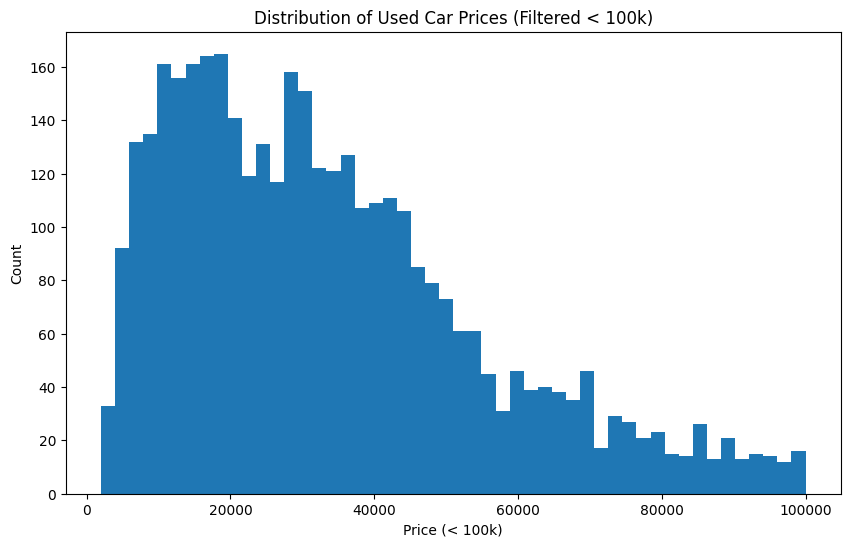

In [24]:
plt.figure(figsize=(10,6))

# Create a cleaned numeric version of the price column
df['price_clean'] = (
    df['price'].str.replace(r'[\$,]', '', regex=True).astype(float)  
)

# Plot histogram of prices below 100,000 to focus on the main distribution range
plt.hist(df[df['price_clean'] < 100000]['price_clean'], bins=50)

# Label the axes
plt.xlabel("Price (< 100k)")
plt.ylabel("Count")

# Title of the plot
plt.title("Distribution of Used Car Prices (Filtered < 100k)")

# Display the plot
plt.show()

## 2.2 Mileage Distribution and Price vs. Mileage (Scatter Plot)


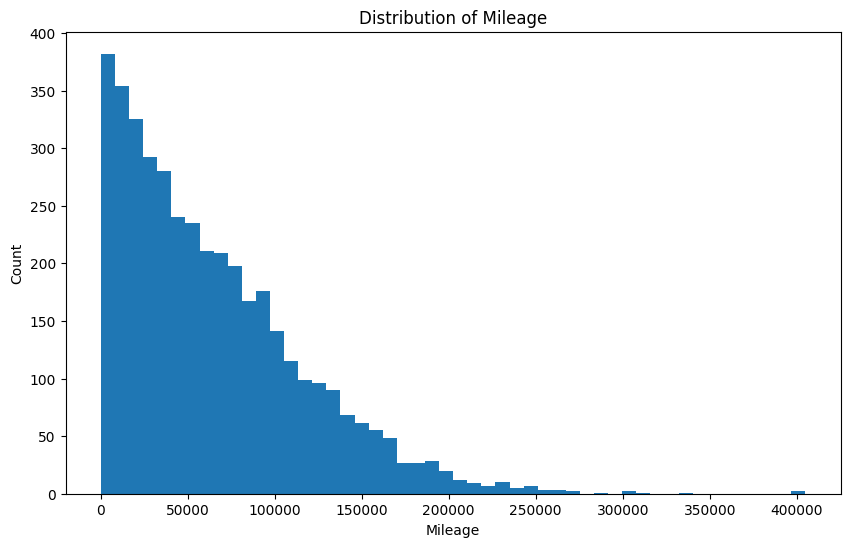

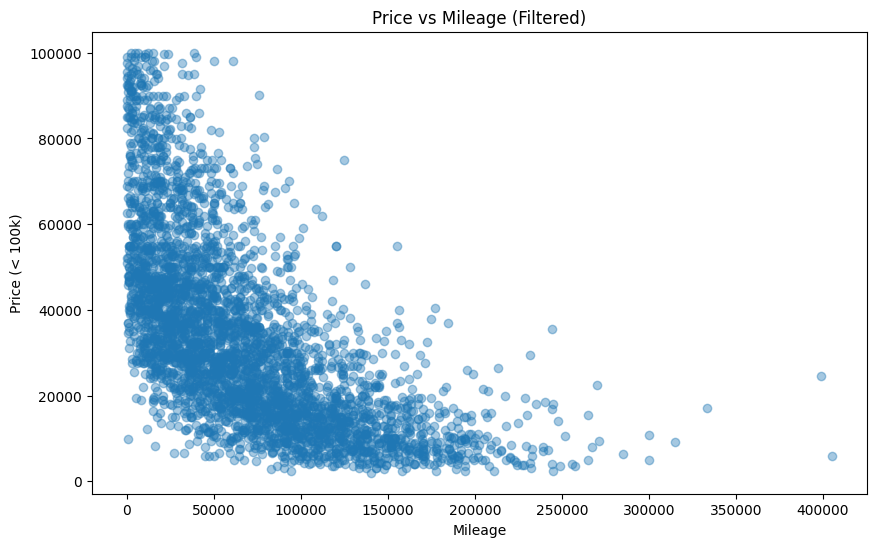

In [25]:
# Clean mileage column first
df['milage_clean'] = (
    df['milage'].str.replace(r'[\, mi\.]', '', regex=True).astype(float)
)

# Distribution of mileage
plt.figure(figsize=(10,6))
plt.hist(df['milage_clean'], bins=50)
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.title("Distribution of Mileage")
plt.show()

# Price vs Mileage
plt.figure(figsize=(10,6))

# Filter cars priced below 100k to focus on the main range
filtered = df[(df['price_clean'] < 100000)]

# Scatter plot of mileage vs. price
plt.scatter(filtered['milage_clean'], filtered['price_clean'], alpha=0.4)
plt.xlabel("Mileage")
plt.ylabel("Price (< 100k)")
plt.title("Price vs Mileage (Filtered)")
plt.show()

## 2.3 Top 20 Car Brands by Average Price

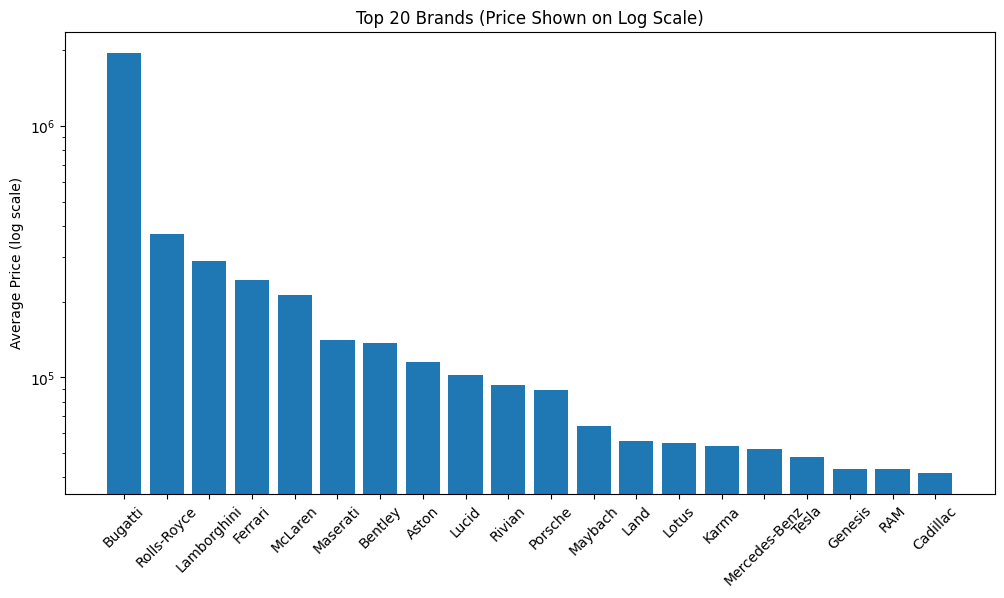

In [26]:
# Compute the average price for each brand and select the top 20
brand_price = df.groupby('brand')['price_clean'].mean().sort_values(ascending=False).head(20)

# Plot the top 20 brands by average price
plt.figure(figsize=(12,6))
plt.bar(brand_price.index, brand_price.values)
plt.yscale('log')   # Use a log scale to better visualize differences
plt.ylabel("Average Price (log scale)")
plt.title("Top 20 Brands (Price Shown on Log Scale)")
plt.xticks(rotation=45)
plt.show()

## 2.4 Effect of Accident and Title Status on Price


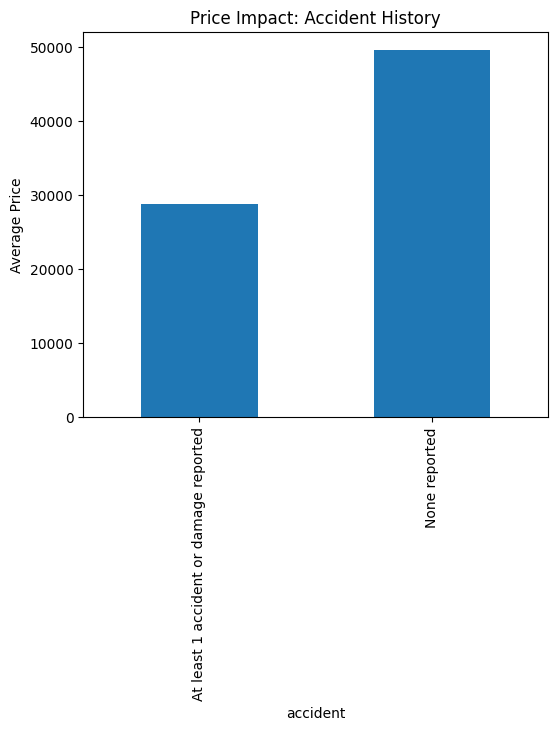

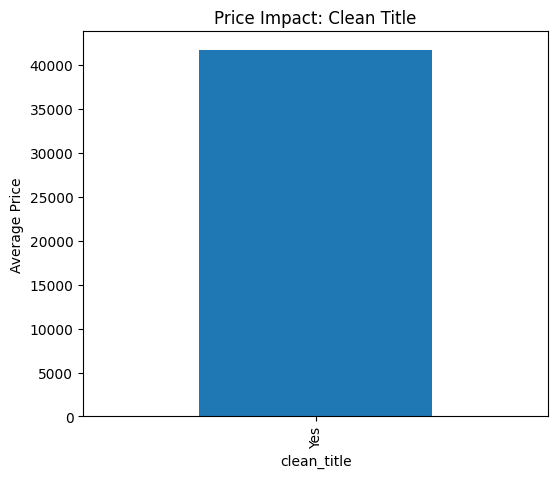

In [27]:
# Calculate the average price for each accident status category
accident_price = df.groupby('accident')['price_clean'].mean()

# Plot the average prices grouped by accident history
plt.figure(figsize=(6,5))
accident_price.plot(kind='bar')
plt.ylabel("Average Price")
plt.title("Price Impact: Accident History")
plt.show()

# Calculate the average price for each clean title category
clean_title_price = df.groupby('clean_title')['price_clean'].mean()

# Plot the average prices grouped by clean title status
plt.figure(figsize=(6,5))
clean_title_price.plot(kind='bar')
plt.ylabel("Average Price")
plt.title("Price Impact: Clean Title")
plt.show()

## 2.5 Correlation Analysis (Heatmap)


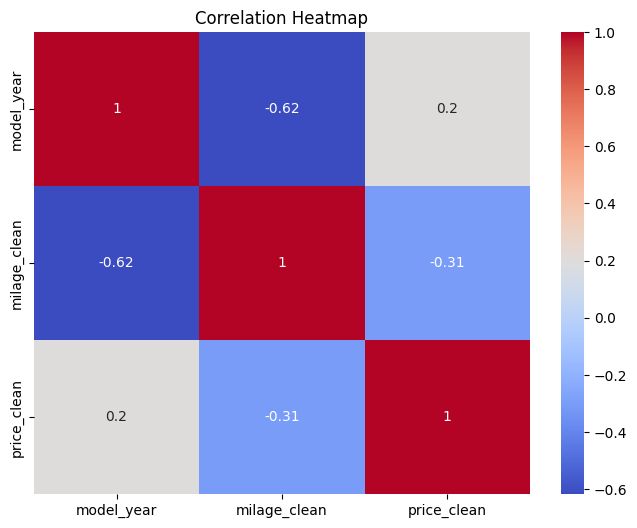

In [28]:
# Import seaborn for correlation heatmap visualization
import seaborn as sns

# Compute the correlation matrix for selected numeric features
corr_df = df[['model_year', 'milage_clean', 'price_clean']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 2.6 Price vs. Model Year (Filtered < 100k)

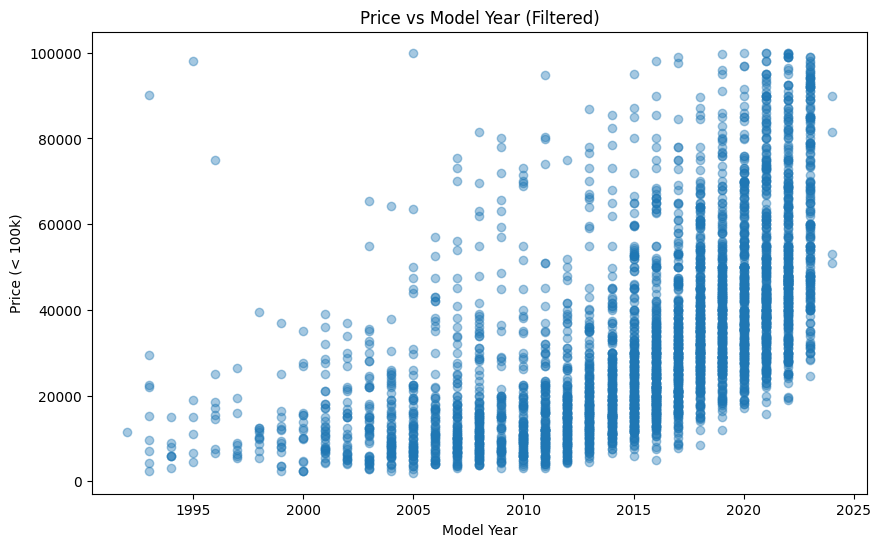

In [29]:
plt.figure(figsize=(10,6))

# Filter out ultra-luxury cars by keeping only vehicles priced below 100k
filtered = df[df['price_clean'] < 100000]

# Scatter plot showing the relationship between model year and price
plt.scatter(filtered['model_year'], filtered['price_clean'], alpha=0.4)
plt.xlabel("Model Year")
plt.ylabel("Price (< 100k)")
plt.title("Price vs Model Year (Filtered)")
plt.show()

# Part III: Data Cleaning & Feature Engineering

In this section, we cleaned and standardized all raw fields, handled missing values, extracted key numeric features (such as engine size, car age, and annual mileage), and removed outliers. Together, these steps produced a clean and well-structured dataset ready for encoding and model training.

## 3.0 Create a Working Copy of the Dataset

In [33]:
df_clean = df.copy()

## 3.1 Clean the Price Column (Remove Symbols and Convert to Float)

In [34]:
# Clean the 'price' column: remove '$' and ',', strip whitespace, and convert to float
df_clean['price_clean'] = (
    df_clean['price']
      .str.replace(r'[\$,]', '', regex=True) 
      .str.strip()
      .replace('', np.nan)
      .astype(float)
)

# Print summary statistics of the cleaned price column
print("Price_clean summary:")
print(df_clean['price_clean'].describe())

Price_clean summary:
count       4,009.00
mean       44,553.19
std        78,710.64
min         2,000.00
25%        17,200.00
50%        31,000.00
75%        49,990.00
max     2,954,083.00
Name: price_clean, dtype: float64


## 3.2 Mileage Cleaning and Conversion to Numeric Format

In [35]:
# Clean the 'milage' column: remove commas, whitespace, and 'mi.' suffix, then convert to float
df_clean['milage_clean'] = (
    df_clean['milage']
      .str.replace(r'[,\s]|mi\.', '', regex=True) 
      .str.strip()
      .replace('', np.nan)
      .astype(float)
)

# Print summary statistics for the cleaned mileage column
print("\nMileage_clean summary:")
print(df_clean['milage_clean'].describe())


Mileage_clean summary:
count     4,009.00
mean     64,717.55
std      52,296.60
min         100.00
25%      23,044.00
50%      52,775.00
75%      94,100.00
max     405,000.00
Name: milage_clean, dtype: float64


## 3.3 Extract Engine Displacement (e.g., "3.5L" → 3.5)

In [36]:
# Extract engine displacement (e.g., "3.5L" → "3.5") using a regex pattern
engine_liter = df_clean['engine'].str.extract(
    r'(\d+\.?\d*)\s*[Ll]',  # Match patterns like 3.7L / 2L / 5.0 L
    expand=False
)

# Convert the extracted displacement value to float
df_clean['engine_liter'] = engine_liter.astype(float)

# Print summary statistics for the cleaned engine_liter column
print("\nEngine_liter summary:")
print(df_clean['engine_liter'].describe())


Engine_liter summary:
count   3,792.00
mean        3.68
std         1.42
min         0.65
25%         2.50
50%         3.50
75%         4.70
max         8.40
Name: engine_liter, dtype: float64


### Fill Missing Engine Displacement with Brand Median

In [37]:
# Compute the median engine displacement for each brand
brand_engine_median = df_clean.groupby('brand')['engine_liter'].median()

# Define a function that fills missing engine_liter values
# If the value is missing, replace it with the brand-specific median; 
# otherwise, keep the original value.
def fill_engine_liter(row):
    if pd.isna(row['engine_liter']):
        brand = row['brand']
        median_value = brand_engine_median.get(brand, np.nan)
        return median_value
    else:
        return row['engine_liter']

# Apply the imputation function row-by-row and print summary statistics
df_clean['engine_liter'] = df_clean.apply(fill_engine_liter, axis=1)
print("\nEngine_liter summary:")
print(df_clean['engine_liter'].describe())


Engine_liter summary:
count   3,901.00
mean        3.68
std         1.41
min         0.65
25%         2.50
50%         3.50
75%         4.60
max         8.40
Name: engine_liter, dtype: float64


## 3.4 Standardize Categorical Feature Formatting

In [38]:
# List of categorical columns to normalize
categorical_cols = [
    'brand', 'model', 'fuel_type', 'transmission',
    'ext_col', 'int_col', 'accident', 'clean_title'
]

# Convert categorical columns to lowercase strings and strip whitespace
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype(str).str.lower().str.strip()

## 3.5 Handle Missing Values for Categorical Columns

In [39]:
# Replace 'nan' strings and fill missing values in fuel_type with 'unknown'
df_clean['fuel_type'] = df_clean['fuel_type'].replace('nan', np.nan).fillna('unknown')

# Replace 'nan' strings and fill missing values in accident with 'none reported'
df_clean['accident'] = df_clean['accident'].replace('nan', np.nan).fillna('none reported')

# Normalize accident text formatting
df_clean['accident'] = df_clean['accident'].str.lower().str.strip()

# Convert accident descriptions to a simplified yes/no format
df_clean['accident'] = df_clean['accident'].apply(
    lambda x: 'yes' if 'at least' in x else 'no'
)

# Replace 'nan' strings in clean_title and fill missing values with 'no'
df_clean['clean_title'] = df_clean['clean_title'].replace('nan', np.nan).fillna('no')

## 3.6 Feature Engineering: Car Age

In [40]:
import datetime

# Create the 'car_age' feature by subtracting model year from current year
current_year = datetime.datetime.now().year
df_clean['car_age'] = current_year - df_clean['model_year']

## 3.7 Feature Engineering: Mileage per Year

In [41]:
# The +1 avoids division by zero for new cars (car_age = 0)
df_clean['mileage_per_year'] = df_clean['milage_clean'] / (df_clean['car_age'] + 1)

## 3.8 Drop Unnecessary Raw Text Columns

In [42]:
cols_to_drop = ['price', 'milage', 'engine']

# Drop the specified columns from the cleaned dataset
df_clean = df_clean.drop(columns=cols_to_drop)

## 3.9 Remove Outliers (Price < 100k, Mileage < 300k, Car Age < 50 Years)

In [43]:
mask = (
    (df_clean['price_clean'] < 100000) &
    (df_clean['milage_clean'] < 300000) &
    (df_clean['car_age'] < 50)
)

# Apply the mask to filter outliers and reset the index
df_clean = df_clean[mask].reset_index(drop=True)

print("\nAfter outlier removal, shape:", df_clean.shape)


After outlier removal, shape: (3768, 14)


## 3.10 Final Data Check

In [45]:
print("\nCleaned Data Info:")
print(df_clean.info())

df_clean.head()


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3768 non-null   object 
 1   model             3768 non-null   object 
 2   model_year        3768 non-null   int64  
 3   fuel_type         3768 non-null   object 
 4   transmission      3768 non-null   object 
 5   ext_col           3768 non-null   object 
 6   int_col           3768 non-null   object 
 7   accident          3768 non-null   object 
 8   clean_title       3768 non-null   object 
 9   price_clean       3768 non-null   float64
 10  milage_clean      3768 non-null   float64
 11  engine_liter      3661 non-null   float64
 12  car_age           3768 non-null   int64  
 13  mileage_per_year  3768 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 412.3+ KB
None


,brand,model,model_year,fuel_type,transmission,ext_col,int_col,accident,clean_title,price_clean,milage_clean,engine_liter,car_age,mileage_per_year
0,ford,utility police interceptor base,2013,e85 flex fuel,6-speed a/t,black,black,yes,yes,"10,300.00","51,000.00",3.70,12,"3,923.08"
1,hyundai,palisade sel,2021,gasoline,8-speed automatic,moonlight cloud,gray,yes,yes,"38,005.00","34,742.00",3.80,4,"6,948.40"
2,lexus,rx 350 rx 350,2022,gasoline,automatic,blue,black,no,no,"54,598.00","22,372.00",3.50,3,"5,593.00"
3,infiniti,q50 hybrid sport,2015,hybrid,7-speed a/t,black,black,no,yes,"15,500.00","88,900.00",3.50,10,"8,081.82"
4,audi,q3 45 s line premium plus,2021,gasoline,8-speed automatic,glacier white metallic,black,no,no,"34,999.00","9,835.00",2.00,4,"1,967.00"


# Part IV: Encoding and Train/Test Split

This section introduced the preprocessing pipeline and train/test split, ensuring that both categorical and numeric features are properly encoded and that the dataset is ready for model training.

## 4.1 Prepare Feature Matrix (X) and Target Variable (y)

In [46]:
from sklearn.model_selection import train_test_split

# Define target variable (price)
y = df_clean['price_clean']

# Define feature matrix by removing the target column
X = df_clean.drop(columns=['price_clean'])

## 4.2 Train/Test Split

In [47]:
# Split the dataset into training and testing sets
# 80% for training, 20% for testing, using a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes of the resulting splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3014, 13)
Test shape: (754, 13)


## 4.3 ColumnTransformer: Preprocessing for Categorical and Numeric Features

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# 1. Define categorical and numeric feature lists
categorical_features = ['brand', 'model', 'fuel_type', 'transmission',
                        'ext_col', 'int_col', 'accident', 'clean_title']

numeric_features = ['model_year', 'milage_clean', 'engine_liter', 
                    'car_age', 'mileage_per_year']

# 2. Preprocessing pipeline for numeric features:
#    - Handle missing values using median imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# 3. Preprocessing pipeline for categorical features:
#    - Fill missing values using most frequent value
#    - Apply OneHotEncoder for categorical encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Combine preprocessing for categorical and numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numeric', numeric_transformer, numeric_features)
    ]
)

# Part V: Modeling

This section trained three different predictive models—Linear Regression, Random Forest,  
and XGBoost—using a unified preprocessing pipeline, and evaluated their performance to identify  
the most effective approach for used car price prediction.  

## 5.1 Linear Regression Model Training

In [49]:
from sklearn.linear_model import LinearRegression

# Build a modeling pipeline that includes:
# 1. Preprocessing
# 2. Linear Regression model
lr_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'fuel_type', 'transmission',
                                                   'ext_col', 'int_col',
                                                   'accident', 'clean_title']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['model_year', 'milage_clean',
                                                   'engine_liter', 'car_age',
                                                   'mileage_per_year'])])),
                ('model', LinearRegression())])

## 5.2 Random Forest Regression Model

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Build a pipeline that includes:
# 1. Preprocessing
# 2. Random Forest Regressor with specified hyperparameters
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,   # Number of trees in the forest
        max_depth=None,     # Allow full tree growth
        random_state=42
    ))
])

# Fit the Random Forest model on the training set
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'fuel_type', 'transmission',
                                                   'ext_col', 'int_col',
                                                   'accident', 'clean_title']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['model_year', 'milage_clean',
                                                   'engine_liter', 'car_age',
                                                   'mileage_per_year'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

## 5.3 XGBoost Regression Model (Primary Model)

In [51]:
from xgboost import XGBRegressor

# Build a pipeline with:
# 1. Preprocessing via ColumnTransformer
# 2. XGBoost regressor with tuned hyperparameters
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,      # Number of boosting rounds (trees)
        learning_rate=0.05,    # Step size shrinkage
        max_depth=8,           # Maximum depth of each tree
        subsample=0.8,         # Fraction of training samples for each tree
        colsample_bytree=0.8,  # Fraction of features for each tree
        random_state=42
    ))
])

# Fit the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'fuel_type', 'transmission',
                                                   'ext_col', 'int_col',
                                                   'accident', 'clean_title']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

## 5.4 Evaluation Function for Model Performance (MAE / RMSE / R²)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to evaluate model performance on the test set
def evaluate(model, X_train, X_test, y_train, y_test):
    # Generate predictions on the test data
    preds = model.predict(X_test)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, preds)            # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_test, preds))   # Root Mean Squared Error
    r2 = r2_score(y_test, preds)                        # R² score

    return mae, rmse, r2

## 5.5 Model Performance Comparison (Linear Regression vs Random Forest vs XGBoost)

In [53]:
# Evaluate all three models and store results in a dictionary
results = {
    "Linear Regression": evaluate(lr_model, X_train, X_test, y_train, y_test),
    "Random Forest": evaluate(rf_model, X_train, X_test, y_train, y_test),
    "XGBoost": evaluate(xgb_model, X_train, X_test, y_train, y_test)
}

import pandas as pd

# Convert results into a DataFrame for easier comparison
# Rows = models, Columns = metrics (MAE, RMSE, R²)
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T

# Display the performance comparison table
results_df

,MAE,RMSE,R²
Linear Regression,"9,288.59","12,390.08",0.68
Random Forest,"6,525.31","9,751.20",0.80
XGBoost,"5,832.22","8,654.54",0.85


# Part VI: Predicted vs Actual（Scatter Plot）

This section compares actual vs predicted prices for each model using scatter plots, revealing how well the models capture real pricing patterns, with XGBoost showing the strongest alignment.

## 6.1 XGBoost: Actual vs Predicted Prices (Scatter Plot)

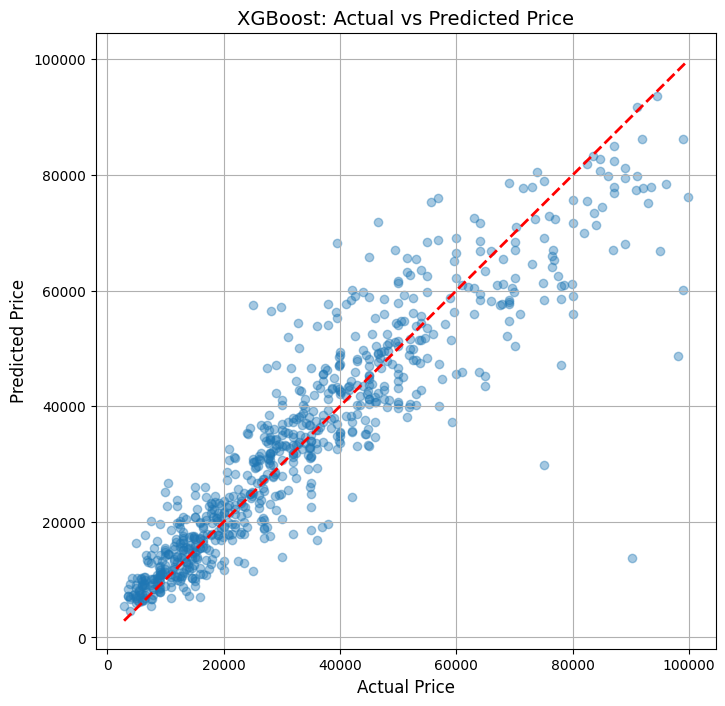

In [55]:
import matplotlib.pyplot as plt

# Generate predictions using the trained XGBoost model
xgb_preds = xgb_model.predict(X_test)

# Create a scatter plot comparing actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, xgb_preds, alpha=0.4)

# Plot a reference line (y = x) for perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)

plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("XGBoost: Actual vs Predicted Price", fontsize=14)

# Add grid for better readability
plt.grid(True)
plt.show()

## 6.2 Random Forest: Actual vs Predicted Prices (Scatter Plot)

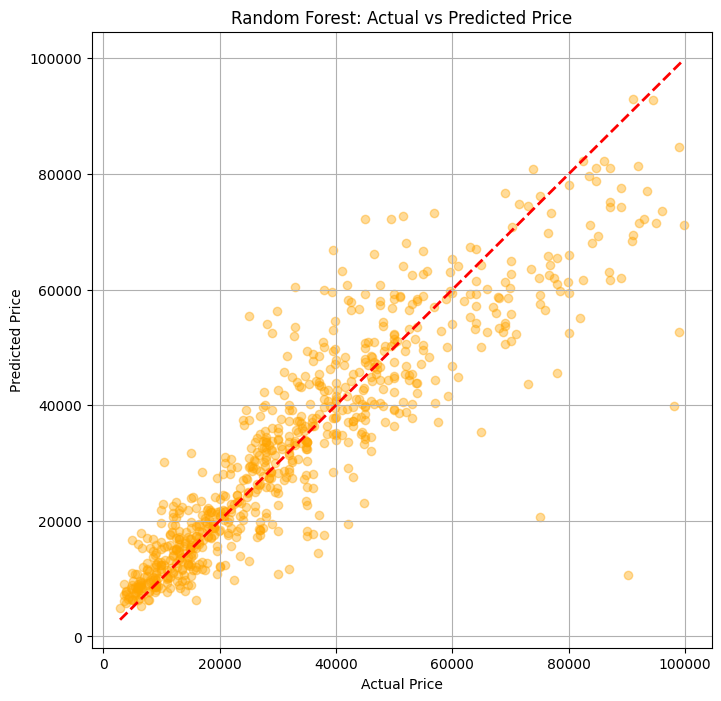

In [56]:
# Generate predictions using the trained Random Forest model
rf_preds = rf_model.predict(X_test)

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, rf_preds, alpha=0.4, color='orange')

# Plot a reference diagonal line representing perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.grid(True)
plt.show()

# Part VII: Feature Importance

This section analyzed feature importance from XGBoost and Random Forest, revealing that mileage, model year, engine size, and car age contribute most to predicting used car prices.

## Define a function to retrieve all feature names after One-Hot Encoding

In [60]:
def get_feature_names(preprocessor):
    # Access the OneHotEncoder inside the categorical transformer
    ohe = preprocessor.named_transformers_['categorical']['onehot']

    # Get names of all one-hot encoded categorical features
    ohe_features = ohe.get_feature_names_out(categorical_features)

    # Combine one-hot features with original numeric features
    all_features = list(ohe_features) + numeric_features
    return all_features

# Retrieve all processed feature names
feature_names = get_feature_names(preprocessor)

## 7.1 XGBoost Feature Importance (Top 20 Features)

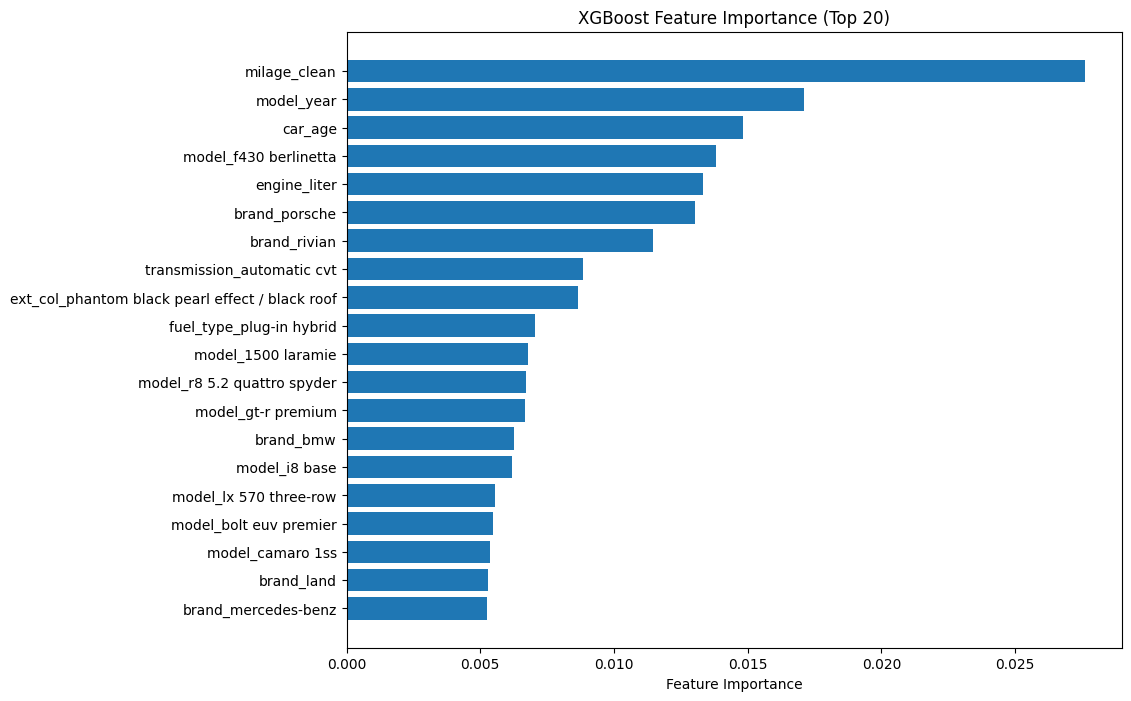

In [61]:
import numpy as np

# Extract feature importance values from the trained XGBoost model
xgb_importances = xgb_model.named_steps['model'].feature_importances_
indices = np.argsort(xgb_importances)[-20:]   # Top 20 features

# Plot top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), xgb_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Top 20)")
plt.show()

## 7.2 Random Forest Feature Importance (Top 20)

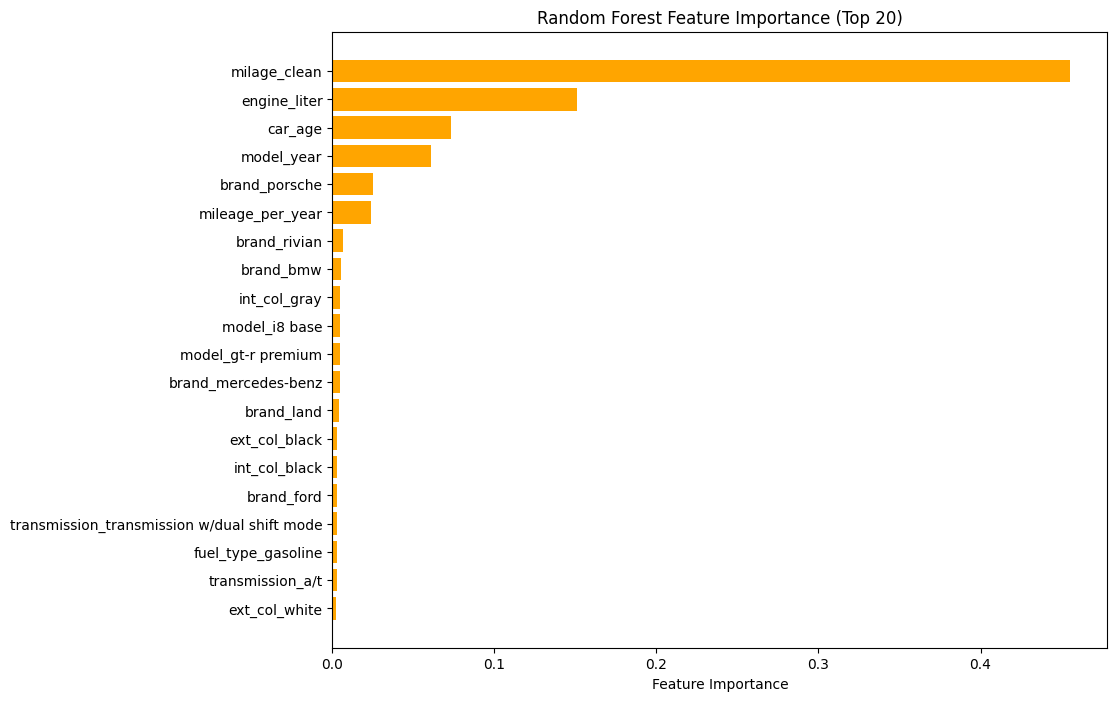

In [62]:
# Extract feature importances from the trained Random Forest model
rf_importances = rf_model.named_steps['model'].feature_importances_
indices = np.argsort(rf_importances)[-20:]

# Plot the top 20 Random Forest feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), rf_importances[indices], align='center', color='orange')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Top 20)")
plt.show()